**Wokrsheet 5, 6, 7**

**Worksheet 5**

1. Filtering long data sequences.

**Load Libraries**

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin
from scipy.signal import freqz

**Select Parameters**

In [18]:
xn = np.array([1, 2, -1, 3, -2, 4, 1, -3, 1, 1, -1 ,1]) # input sequence
hn = np.array([1, -1, 1]) # impulse sequence

M = len(hn)  # Length of impulse sequence
L = int(len(xn) / M)  # Length of input frame
N = L + M - 1  # Length of output frame
L_yn = (int(len(xn) / L) * L) + M - 1 # Length of yn or final output (formula : No. of samples in xn (input sequence)/ No of smaples in each xn frame * No. of samples in each frame of xn + Lenght of hn()impulse sequence - 1)
Prepend_count = N - L # No. of prepend samples
# Pad nn with zeros to make it of length N
# hn = np.concatenate((nn, np.zeros(N - M)))

# Initialize the output sequence yn
yn = np.zeros(L_yn)
k = 0 # iterator for xn

hn_padded = np.pad(hn,(0,N - M))

(a) Implement the OLA (Overlap-Add Method) Algorithm.

**Perform OLA**

In [19]:
count = 0
# Perform convolution and overlapping-add for each frame
while(k < len(xn)):

  count += 1
  # Create a frame from xin
  # frame_xin = np.zeros(N)
  start_idx = k               # starting index of output frame
  frame_yin = np.zeros(N)     # Initialize output sequence with zeros
  frame_xn = np.zeros(L)      # Initialise input frame with zeros

  frame_xn = xn[k:k + L]      # input frame
  k += L
  end_idx = k                 # upto non-overlap portion of output frame

  print('xn frame {} : {}'.format(count,frame_xn))
  # Convolve the frame with hn (Linear Concolution)
  for i in range(len(frame_xn)):         #looping for creating output response y
    for j in range(M):
      frame_yin[i + j] += frame_xn[i]*hn[j]

  print('Frame {} after linear concolution : {}'.format(count,frame_yin))
  # Add the frame to the output sequence at the correct position
  yn[start_idx:end_idx + M - 1] += frame_yin



xn frame 1 : [ 1  2 -1  3]
Frame 1 after linear concolution : [ 1.  1. -2.  6. -4.  3.]
xn frame 2 : [-2  4  1 -3]
Frame 2 after linear concolution : [-2.  6. -5.  0.  4. -3.]
xn frame 3 : [ 1  1 -1  1]
Frame 3 after linear concolution : [ 1.  0. -1.  3. -2.  1.]


In [21]:
print('Input Sequence is : {} '.format(xn))
print('Impulse Sequence is : {} '.format(hn))
print('Output Sequence is : {} '.format(yn))

Input Sequence is : [ 1  2 -1  3 -2  4  1 -3  1  1 -1  1] 
Impulse Sequence is : [ 1 -1  1] 
Output Sequence is : [ 1.  1. -2.  6. -6.  9. -5.  0.  5. -3. -1.  3. -2.  1.] 


(b) Implement the OLS (Overlap-Save Method) Algorithm.

**Frame Generation for xn sequence**

In [22]:
def frame_generation(xn,hn):

    j = 0
    k = 0
    xin = []

    while(k < len(xn)):

      if len(xin) == 0:
        xin.append(np.zeros(N))
        for i in range(L):
          xin[0][i + Prepend_count] += xn[k]
          k += 1
        j += 1
      elif k < len(xn):
        frame_xn = np.zeros(N)
        l = 0

        for l in range(Prepend_count):
          frame_xn[l] += xin[j - 1][N - Prepend_count + l] #previous_frame_element to carry in next frame upto L no of samples

        l += 1
        while(l < N and k < len(xn)):
          frame_xn[l] += xn[k]
          k += 1
          l += 1
        xin.append(frame_xn)
        j += 1

    frame_xn = np.zeros(N)
    l = 0

    for l in range(Prepend_count):
      frame_xn[l] += xin[j - 1][N - Prepend_count + l] #previous_frame_element to carry in next frame upto L no of samples
    j += 1
    l += 1
    xin.append(frame_xn)
    full_stack = np.vstack(xin)
    print(full_stack)

    return full_stack

**Circular Convolution**

In [23]:
def circular_convolution(frame_xn,hn):
    M = len(frame_xn)
    N = len(hn)

    if M != N:
        raise ValueError("Input sequences must have the same length for circular convolution.")

    result = [0] * M

    for n in range(M):
        for k in range(M):
            result[n] += frame_xn[k] * hn[(n - k) % M]

    return result

**Perform OLS**

In [24]:
yn = np.zeros(L_yn)
k = 0 # iterator for xn

hn_padded = np.pad(hn,(0,N - M))

frame_xn_array = frame_generation(xn,hn)

for i in range(len(frame_xn_array)):
  frame_yin = np.zeros(N)
  frame_yin += circular_convolution(frame_xn_array[i],hn_padded)

  print('Frame {} after circular convolution : {} '.format(i + 1,frame_yin))

  j = Prepend_count
  while(j < len(frame_yin) and k < len(yn)):
    yn[k] += frame_yin[j]
    j += 1
    k += 1


[[ 0.  0.  1.  2. -1.  3.]
 [-1.  3. -2.  4.  1. -3.]
 [ 1. -3.  1.  1. -1.  1.]
 [-1.  1.  0.  0.  0.  0.]]
Frame 1 after circular convolution : [-4.  3.  1.  1. -2.  6.] 
Frame 2 after circular convolution : [ 3.  1. -6.  9. -5.  0.] 
Frame 3 after circular convolution : [-1. -3.  5. -3. -1.  3.] 
Frame 4 after circular convolution : [-1.  2. -2.  1.  0.  0.] 


**Print Input and Output**

In [25]:
print('Input Sequence is : {} '.format(xn))
print('Impulse Sequence is : {} '.format(hn))
print('Output Sequence is : {} '.format(yn))

Input Sequence is : [ 1  2 -1  3 -2  4  1 -3  1  1 -1  1] 
Impulse Sequence is : [ 1 -1  1] 
Output Sequence is : [ 1.  1. -2.  6. -6.  9. -5.  0.  5. -3. -1.  3. -2.  1.] 


**Worksheet 6**

1. Design a highpass FIR filter with the following specifications: Stopband = 0–1,500 Hz Passband = 2,500–4,000 Hz Stopband attenuation = 40 dB Pass-
band ripple = 0.1 dB Sampling rate = 8,000 Hz

**Select Parameters**

In [26]:
# Define filter parameters
tap = 25        # Number of taps
Fc = 1600       # Cutoff frequency in Hz
Fs = 8000       # Sampling rate in Hz
window_func = "boxcar"  # Window function for filter design

**Design and Compute filter**

In [27]:
def firdesign(tap, Fs, Fc, win="boxcar", fir_type='lowpass'):
    # Calculate the normalized cutoff frequency
    normalized_cutoff = Fc / (Fs / 2)

    # Design the FIR filter coefficients
    if fir_type == 'lowpass':
        b = firwin(tap, normalized_cutoff, window=win)
    elif fir_type == 'highpass':
        b = firwin(tap, normalized_cutoff, window=win, pass_zero=False)
    else:
        raise ValueError("Unsupported fir_type. Choose 'lowpass' or 'highpass'.")

    return b, [1.0]  # Return filter coefficients 'b' and 'a' (always [1.0] for FIR)




def coeff2freq_response(b, a):
    # Compute the frequency response
    w, H = freqz(b, a)

    return w, H


# Design the high-pass FIR filter
b, a = firdesign(tap, Fs, Fc, win=window_func, fir_type='highpass')

# Compute the frequency response
w, H = coeff2freq_response(b, a)

# Convert angular frequency to Hz
F = w * Fs / (2 * np.pi)


**Plot Section**

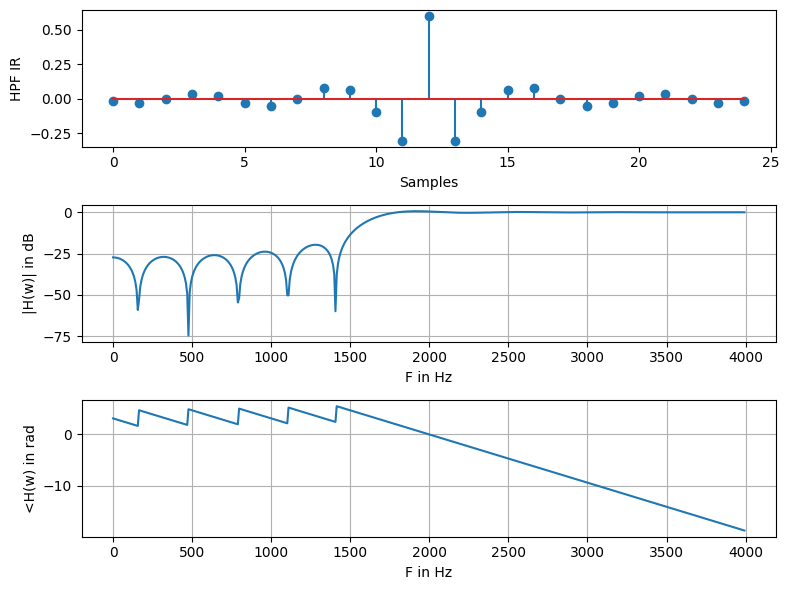

In [28]:

# Plot the impulse response
plt.figure(figsize=(8, 6))
plt.subplot(3, 1, 1)
plt.stem(b)
plt.ylabel('HPF IR')
plt.xlabel('Samples')

# Plot the magnitude response in dB
plt.subplot(3, 1, 2)
plt.plot(F, 20 * np.log10(np.abs(H)))
plt.grid()
plt.ylabel('|H(w)| in dB')
plt.xlabel('F in Hz')

# Plot the phase response in radians
plt.subplot(3, 1, 3)
plt.plot(F, np.unwrap(np.angle(H)))
plt.grid()
plt.ylabel('<H(w) in rad')
plt.xlabel('F in Hz')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


**Worksheet 7**

1. Design a second-order digital lowpass Butterworth filter with a cutoff fre-
quency of 3.4 kHz at a sampling frequency of 8,000 Hz.

**Select Parameters**

In [29]:
# Define the filter specifications
fs = 8000  # Sampling frequency in Hz
fc = 3400  # Cutoff frequency in Hz
order = 2  # Filter order

**Calculation and Designing of Filter**

In [30]:

# Calculate the normalized cutoff frequency
normalized_cutoff = fc /fs

# Calculate the angular frequency (omega_c)
wc = 2 * np.pi * normalized_cutoff

# Generate a list of frequencies
frequencies = np.linspace(0, 0.5, 1000)  # Frequencies from 0 to Nyquist, 1000 is the equally spaced points between 0 and 0.5.

# Calculate the frequency response using the Butterworth filter formula
H = 1 / (1 + 1j * (frequencies / normalized_cutoff) ** (2 * order))


**Plot Section**

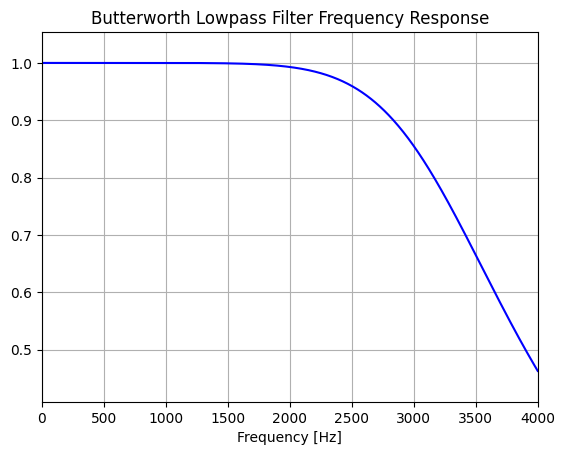

In [31]:
# Plot the frequency response
plt.figure()
plt.plot(frequencies * fs, np.abs(H), 'b')
plt.title("Butterworth Lowpass Filter Frequency Response")
plt.xlabel("Frequency [Hz]")
plt.margins(0, 0.1)
plt.grid()
plt.show()